In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
train = np.loadtxt('BovW/training_2b_32')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA(n_components=2)
X1 = np.loadtxt("BovW/training_2b_c1_32")    
X2 = np.loadtxt("BovW/training_2b_c2_32")
X3 = np.loadtxt("BovW/training_2b_c3_32")

In [2]:
X = np.array([X1,X2,X3])
d = X1[0].shape[0]

In [3]:
mean_vectors = []
for i in range(0,3):
    mean_vectors.append(np.mean(X[i], axis=0))

In [4]:
S_W = np.zeros((d,d))
for cl,mv in zip(range(0,3), mean_vectors):
    class_sc_mat = np.cov(X[i].T) * len(X[i])
    S_W += class_sc_mat   


In [5]:
s1 = np.sum(X1,axis = 0)
s2 = np.sum(X2,axis = 0)
s3 = np.sum(X3,axis = 0)
overall_mean = (s1+s1+s3)/(len(X1)+len(X2)+len(X3))
S_B = np.zeros((d,d))
for i,mean_vec in enumerate(mean_vectors):  
    n = len(X[i])
    mean_vec = mean_vec.reshape(d,1) # make column vector
    overall_mean = overall_mean.reshape(d,1) # make column vector
#     print (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print S_B.shape

(32, 32)


In [6]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [12]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

3031.6318303839935
340.053511779973
4.4277230923159383e-13
4.4277230923159383e-13
4.3181410309299926e-13
2.1750256338641843e-13
2.1750256338641843e-13
1.7569085673631144e-13
1.7569085673631144e-13
1.2934844190161119e-13
1.1535217225855376e-13
1.1337692315781194e-13
1.1337692315781194e-13
9.264899446990709e-14
9.264899446990709e-14
8.237501139299575e-14
7.647854198294121e-14
7.647854198294121e-14
7.302830946522467e-14
7.302830946522467e-14
7.118439213742175e-14
7.118439213742175e-14
5.73084990362088e-14
5.73084990362088e-14
5.2862937960616923e-14
5.2862937960616923e-14
4.894435947343502e-14
3.071670492703337e-14
2.234907542863926e-14
2.234907542863926e-14
5.8998236408885846e-15
4.974452511940962e-15


In [13]:
W = np.hstack((eig_pairs[0][1].reshape(d,1), eig_pairs[1][1].reshape(d,1)))

In [14]:
files = ["training_2b_32","test_2b_32","test_2b_32_c1","test_2b_32_c2","test_2b_32_c3","training_2b_c1_32","training_2b_c2_32","training_2b_c3_32"]
for file in files:
    data = np.loadtxt("BovW/"+file)
    p = data.dot(W.real)
    np.savetxt("BovW/FDA/"+file, p)

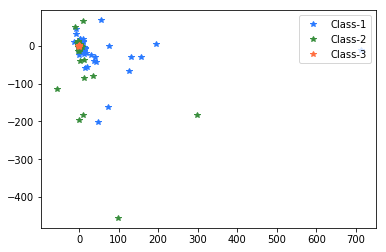

In [18]:
c2={}
c2[1]='#2979FF'
c2[2]='#388E3C'
c2[3]='#FF6E40'

newX = np.loadtxt("BovW/FDA/training_2b_c1_32")   
x = []
y = []
for i in newX:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c=c2[1],marker='*',linestyle='None',label="Class-1")
newX = np.loadtxt("BovW/FDA/training_2b_c2_32")   
x = []
y = []
for i in newX:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c=c2[2],marker='*',linestyle='None',label="Class-2")
newX = np.loadtxt("BovW/FDA/training_2b_c3_32")   
x = []
y = []
for i in newX:
    x.append(i[0])
    y.append(i[1])
plt.plot(x,y,c=c2[3],marker='*',linestyle='None',label="Class-3")
plt.legend(loc='upper right')